In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()
%matplotlib inline

import math
#import cudf
#from cuml import ExponentialSmoothing as HW
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA


from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from kats.consts import TimeSeriesData
#from kats.detectors.detector import FFTDetector
from kats.detectors.seasonality import FFTDetector
from kats.tsfeatures.tsfeatures import TsFeatures





In [2]:
# Set dimensions for printing
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('/home/samuel/Documents/First Semester/SEL/windturbine.csv', header=0 , parse_dates=[0])

In [4]:
df.head()

Unnamed: 0  ActivePower  AmbientTemperatue  BearingShaftTemperature  \
0 2017-12-31 00:00:00+00:00          NaN                NaN                      NaN   
1 2017-12-31 00:10:00+00:00          NaN                NaN                      NaN   
2 2017-12-31 00:20:00+00:00          NaN                NaN                      NaN   
3 2017-12-31 00:30:00+00:00          NaN                NaN                      NaN   
4 2017-12-31 00:40:00+00:00          NaN                NaN                      NaN   

   Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  ControlBoxTemperature  \
0               NaN               NaN               NaN                    NaN   
1               NaN               NaN               NaN                    NaN   
2               NaN               NaN               NaN                    NaN   
3               NaN               NaN               NaN                    NaN   
4               NaN               NaN               NaN                    NaN   

   GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
0                        NaN                    NaN           NaN                           NaN   
1                        NaN                    NaN           NaN                           NaN   
2                        NaN                    NaN           NaN                           NaN   
3                        NaN                    NaN           NaN                           NaN   
4                        NaN                    NaN           NaN                           NaN   

   GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  NacellePosition  \
0                           NaN             NaN                 NaN              NaN   
1                           NaN             NaN                 NaN              NaN   
2                           NaN             NaN                 NaN              NaN   
3                           NaN             NaN                 NaN              NaN   
4                           NaN             NaN                 NaN              NaN   

   ReactivePower  RotorRPM  TurbineStatus  WTG  WindDirection  WindSpeed  
0            NaN       NaN            NaN  G01            NaN        NaN  
1            NaN       NaN            NaN  G01            NaN        NaN  
2            NaN       NaN            NaN  G01            NaN        NaN  
3            NaN       NaN            NaN  G01            NaN        NaN  
4            NaN       NaN            NaN  G01            NaN        NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116152 entries, 0 to 116151
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Unnamed: 0                    116152 non-null  datetime64[ns, UTC]
 1   ActivePower                   92688 non-null   float64            
 2   AmbientTemperatue             91917 non-null   float64            
 3   BearingShaftTemperature       60619 non-null   float64            
 4   Blade1PitchAngle              39934 non-null   float64            
 5   Blade2PitchAngle              39829 non-null   float64            
 6   Blade3PitchAngle              39829 non-null   float64            
 7   ControlBoxTemperature         60263 non-null   float64            
 8   GearboxBearingTemperature     60641 non-null   float64            
 9   GearboxOilTemperature         60538 non-null   float64            
 10  GeneratorRPM        

In [6]:
df.columns

Index(['Unnamed: 0', 'ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'HubTemperature',
       'MainBoxTemperature', 'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WTG', 'WindDirection', 'WindSpeed'],
      dtype='object')

In [7]:
## Rename time index as 'timestamp'
df.columns = ['timestamp', 'ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'HubTemperature',
       'MainBoxTemperature', 'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WTG', 'WindDirection', 'WindSpeed']

In [8]:
df.head()

timestamp  ActivePower  AmbientTemperatue  BearingShaftTemperature  \
0 2017-12-31 00:00:00+00:00          NaN                NaN                      NaN   
1 2017-12-31 00:10:00+00:00          NaN                NaN                      NaN   
2 2017-12-31 00:20:00+00:00          NaN                NaN                      NaN   
3 2017-12-31 00:30:00+00:00          NaN                NaN                      NaN   
4 2017-12-31 00:40:00+00:00          NaN                NaN                      NaN   

   Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  ControlBoxTemperature  \
0               NaN               NaN               NaN                    NaN   
1               NaN               NaN               NaN                    NaN   
2               NaN               NaN               NaN                    NaN   
3               NaN               NaN               NaN                    NaN   
4               NaN               NaN               NaN                    NaN   

   GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
0                        NaN                    NaN           NaN                           NaN   
1                        NaN                    NaN           NaN                           NaN   
2                        NaN                    NaN           NaN                           NaN   
3                        NaN                    NaN           NaN                           NaN   
4                        NaN                    NaN           NaN                           NaN   

   GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  NacellePosition  \
0                           NaN             NaN                 NaN              NaN   
1                           NaN             NaN                 NaN              NaN   
2                           NaN             NaN                 NaN              NaN   
3                           NaN             NaN                 NaN              NaN   
4                           NaN             NaN                 NaN              NaN   

   ReactivePower  RotorRPM  TurbineStatus  WTG  WindDirection  WindSpeed  
0            NaN       NaN            NaN  G01            NaN        NaN  
1            NaN       NaN            NaN  G01            NaN        NaN  
2            NaN       NaN            NaN  G01            NaN        NaN  
3            NaN       NaN            NaN  G01            NaN        NaN  
4            NaN       NaN            NaN  G01            NaN        NaN

In [9]:
#Remove timezone from timestamp
df['timestamp'] = df['timestamp'].dt.tz_localize(None)

In [10]:
df.head()

timestamp  ActivePower  AmbientTemperatue  BearingShaftTemperature  Blade1PitchAngle  \
0 2017-12-31 00:00:00          NaN                NaN                      NaN               NaN   
1 2017-12-31 00:10:00          NaN                NaN                      NaN               NaN   
2 2017-12-31 00:20:00          NaN                NaN                      NaN               NaN   
3 2017-12-31 00:30:00          NaN                NaN                      NaN               NaN   
4 2017-12-31 00:40:00          NaN                NaN                      NaN               NaN   

   Blade2PitchAngle  Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
0               NaN               NaN                    NaN                        NaN   
1               NaN               NaN                    NaN                        NaN   
2               NaN               NaN                    NaN                        NaN   
3               NaN               NaN                    NaN                        NaN   
4               NaN               NaN                    NaN                        NaN   

   GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
0                    NaN           NaN                           NaN   
1                    NaN           NaN                           NaN   
2                    NaN           NaN                           NaN   
3                    NaN           NaN                           NaN   
4                    NaN           NaN                           NaN   

   GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  NacellePosition  \
0                           NaN             NaN                 NaN              NaN   
1                           NaN             NaN                 NaN              NaN   
2                           NaN             NaN                 NaN              NaN   
3                           NaN             NaN                 NaN              NaN   
4                           NaN             NaN                 NaN              NaN   

   ReactivePower  RotorRPM  TurbineStatus  WTG  WindDirection  WindSpeed  
0            NaN       NaN            NaN  G01            NaN        NaN  
1            NaN       NaN            NaN  G01            NaN        NaN  
2            NaN       NaN            NaN  G01            NaN        NaN  
3            NaN       NaN            NaN  G01            NaN        NaN  
4            NaN       NaN            NaN  G01            NaN        NaN

In [11]:
# Make timestamp index and index data to start from January 2018

df = df.set_index('timestamp')
dfCM = df.loc['2018-01-01 00:00:00':]

In [12]:
dfCM.head()

ActivePower  AmbientTemperatue  BearingShaftTemperature  Blade1PitchAngle  \
timestamp                                                                                        
2018-01-01 00:00:00    -5.357727          23.148729                      NaN               NaN   
2018-01-01 00:10:00    -5.822360          23.039754                      NaN               NaN   
2018-01-01 00:20:00    -5.279409          22.948703                      NaN               NaN   
2018-01-01 00:30:00    -4.648054          22.966851                      NaN               NaN   
2018-01-01 00:40:00    -4.684632          22.936520                      NaN               NaN   

                     Blade2PitchAngle  Blade3PitchAngle  ControlBoxTemperature  \
timestamp                                                                        
2018-01-01 00:00:00               NaN               NaN                    NaN   
2018-01-01 00:10:00               NaN               NaN                    NaN   
2018-01-01 00:20:00               NaN               NaN                    NaN   
2018-01-01 00:30:00               NaN               NaN                    NaN   
2018-01-01 00:40:00               NaN               NaN                    NaN   

                     GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  \
timestamp                                                                             
2018-01-01 00:00:00                        NaN                    NaN           NaN   
2018-01-01 00:10:00                        NaN                    NaN           NaN   
2018-01-01 00:20:00                        NaN                    NaN           NaN   
2018-01-01 00:30:00                        NaN                    NaN           NaN   
2018-01-01 00:40:00                        NaN                    NaN           NaN   

                     GeneratorWinding1Temperature  GeneratorWinding2Temperature  HubTemperature  \
timestamp                                                                                         
2018-01-01 00:00:00                           NaN                           NaN             NaN   
2018-01-01 00:10:00                           NaN                           NaN             NaN   
2018-01-01 00:20:00                           NaN                           NaN             NaN   
2018-01-01 00:30:00                           NaN                           NaN             NaN   
2018-01-01 00:40:00                           NaN                           NaN             NaN   

                     MainBoxTemperature  NacellePosition  ReactivePower  RotorRPM  TurbineStatus  \
timestamp                                                                                          
2018-01-01 00:00:00                 NaN         8.000000      -9.960830       NaN            NaN   
2018-01-01 00:10:00                 NaN       300.428571      -9.628441       NaN            NaN   
2018-01-01 00:20:00                 NaN       340.000000      -9.491235       NaN            NaN   
2018-01-01 00:30:00                 NaN       345.000000      -9.856136       NaN            NaN   
2018-01-01 00:40:00                 NaN       345.000000      -9.745593       NaN            NaN   

                     WTG  WindDirection  WindSpeed  
timestamp                                           
2018-01-01 00:00:00  G01       8.000000   2.279088  
2018-01-01 00:10:00  G01     300.428571   2.339343  
2018-01-01 00:20:00  G01     340.000000   2.455610  
2018-01-01 00:30:00  G01     345.000000   2.026754  
2018-01-01 00:40:00  G01     345.000000   1.831420

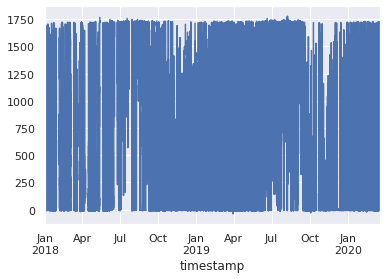

In [13]:
dfCM['ActivePower'].plot();

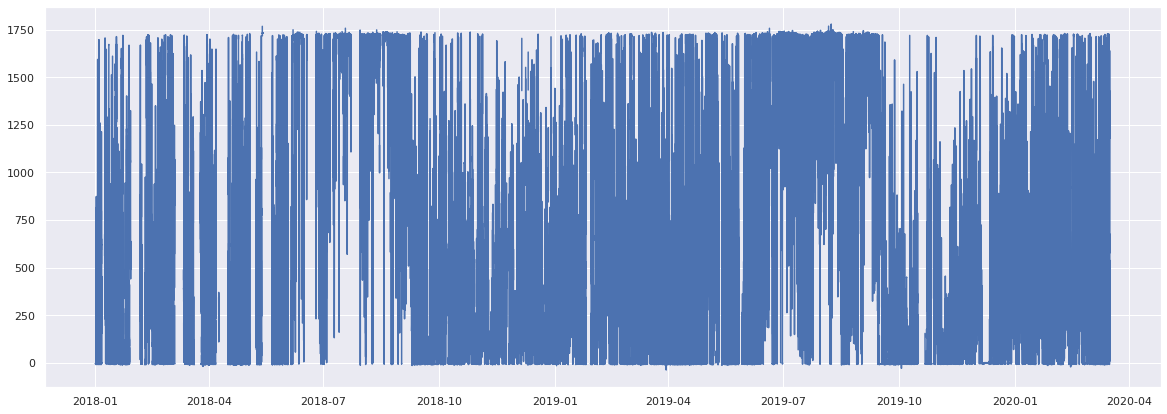

In [14]:
plt.figure(figsize=(20, 7))
plt.plot(dfCM['ActivePower']);

In [15]:
#Group by hour
dataH = dfCM[['ActivePower']]
dataH = dataH.groupby([pd.Grouper(freq='H')]).mean()

In [16]:
dataH

ActivePower
timestamp                       
2018-01-01 00:00:00    -5.091432
2018-01-01 01:00:00    -4.822549
2018-01-01 02:00:00    -4.668977
2018-01-01 03:00:00    -5.262396
2018-01-01 04:00:00    -5.600275
...                          ...
2020-03-16 10:00:00   370.703286
2020-03-16 11:00:00   530.666865
2020-03-16 12:00:00   883.187210
2020-03-16 13:00:00  1219.178958
2020-03-16 14:00:00  1360.960654

[19335 rows x 1 columns]

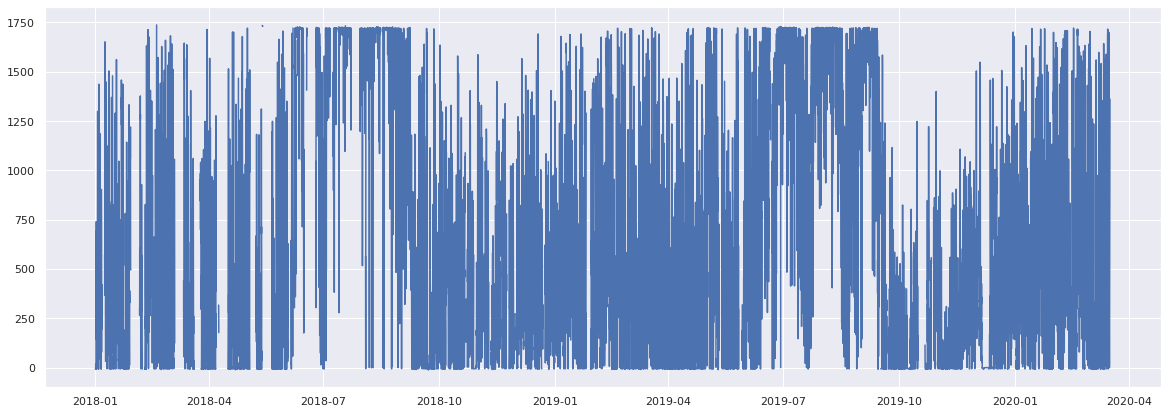

In [17]:
plt.figure(figsize=(20, 7))
plt.plot(dataH)
plt.show()

In [18]:
dataD = dfCM[['ActivePower']]
dataD = dataD.groupby([pd.Grouper(freq='D')]).mean()

In [19]:
dataD

ActivePower
timestamp              
2018-01-01   190.815478
2018-01-02   339.470285
2018-01-03   317.517653
2018-01-04   361.856700
2018-01-05   236.783611
...                 ...
2020-03-12   353.652089
2020-03-13   580.446919
2020-03-14   677.050456
2020-03-15   693.703663
2020-03-16   368.582998

[806 rows x 1 columns]

In [20]:
dataD.describe()

ActivePower
count   737.000000
mean    620.371150
std     488.836712
min      -5.488917
25%     282.604120
50%     458.637504
75%     773.223933
max    1720.200880

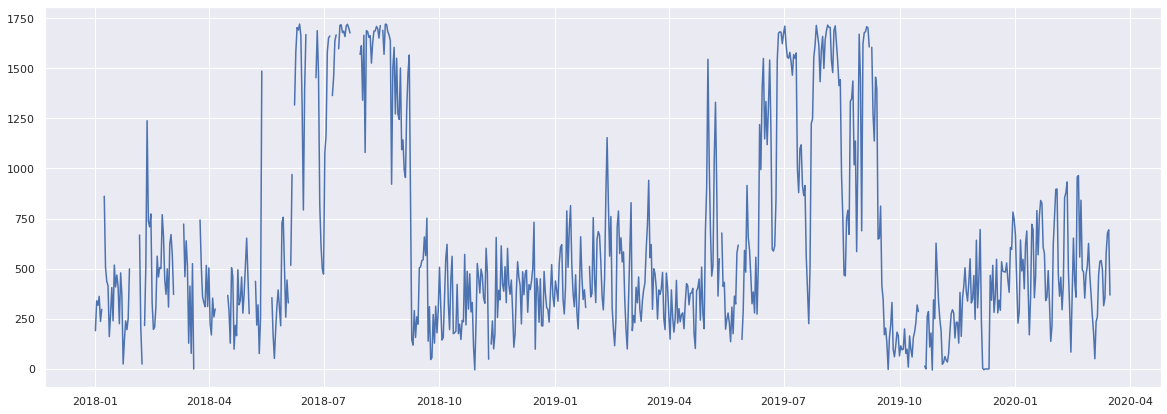

In [21]:
plt.figure(figsize=(20, 7))
plt.plot(dataD)
plt.show()

In [22]:
dataD.isnull().sum()

ActivePower    69
dtype: int64

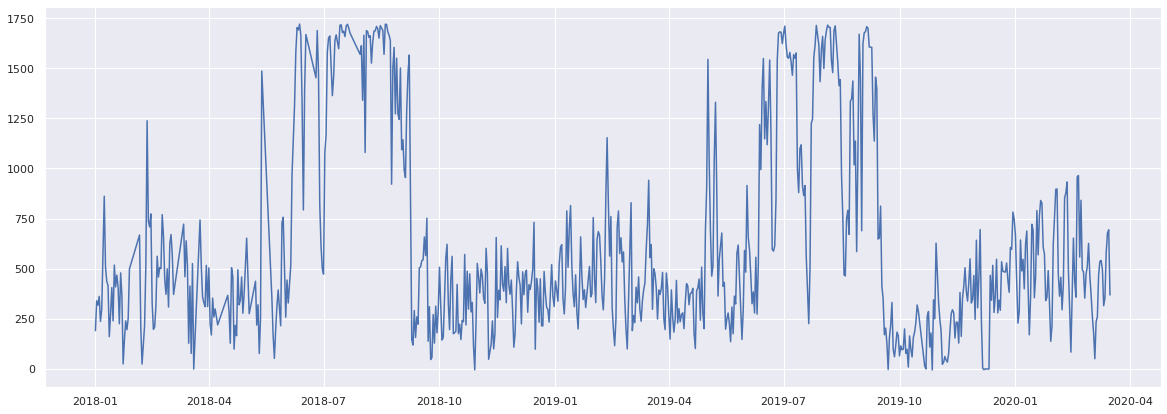

In [23]:
#Fill missing value with mv average
dd = dataD.interpolate()
dd = dd.fillna(method='bfill')
plt.figure(figsize=(20, 7))
plt.plot(dd)
plt.show()

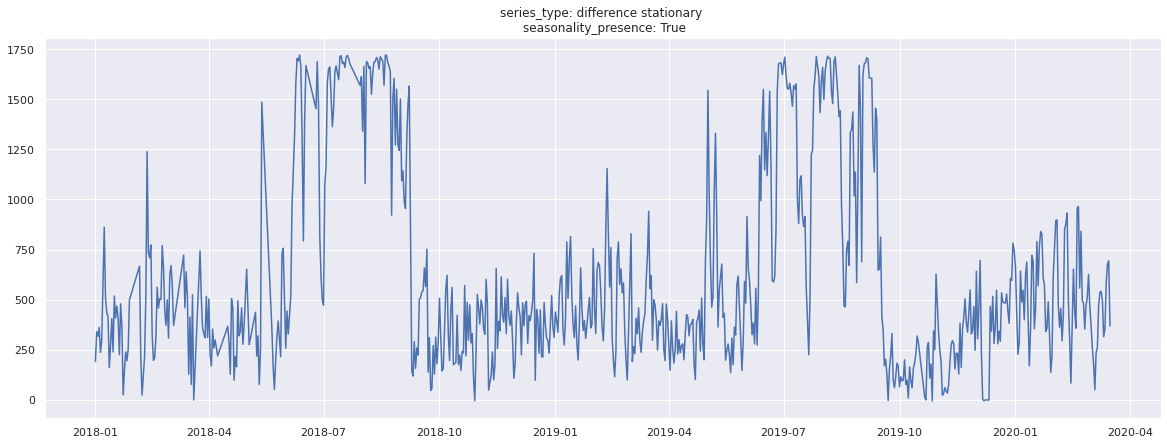

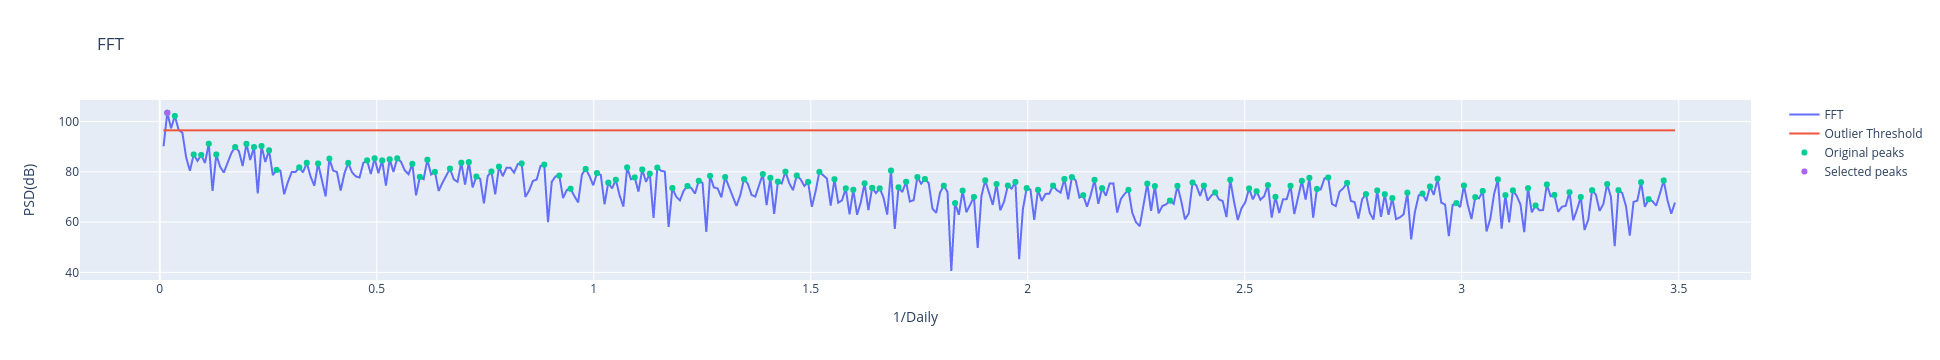

In [24]:
df1 = dd.reset_index()
df1 = df1.rename(columns={"timestamp": "time", "ActivePower": "value"})
df1["time"] = pd.to_datetime(df1['time'])
ts = TimeSeriesData(df1)
fft_detector = FFTDetector(ts)
seasonality_presence = fft_detector.detector()
test_result = []
    # ADF Test
adf_result = adfuller(dd, autolag='AIC')
p_adf = round(adf_result[1],4)
    # KPSS Test
kpss_result = kpss(dd, regression='ct')
p_kpss = round(kpss_result[1],4)
if p_adf > 0.05 and p_kpss < 0.05:
    test_result.append('non stationary')
elif p_adf < 0.05 and p_kpss > 0.05:
    test_result.append('stationary')
elif p_adf > 0.05 and p_kpss > 0.05:
    test_result.append('trend stationary')
else:
    test_result.append('difference stationary')
    
plt.figure(figsize=(20, 7))
plt.plot(dd)
    #ddgg.plot(figsize=(12, 8), title="S&P500 Prices")
plt.title('series_type: %s \n seasonality_presence: %s' % (test_result.pop(), seasonality_presence.get("seasonality_presence")))
plt.show()
fft_detector.plot('Daily', 7)
fft_detector.plot_fft('Daily', 7)

In [25]:

def Holt_Winters_Model_seasonal(dataF, seasonal_period):


    data = dataF

    y = data
    dataT = dataF
    
    ddf2 = dataF[(dataF.index >= dataF.index.min()) & (dataF.index < dataF.index.max())]
    dataT = ddf2
    dataT = dataT.groupby([pd.Grouper(freq='H')]).mean()
    avg = float(dataT[~np.isnan(dataT)].mean())
    dataT = dataT.fillna(avg)
    #yT = dataT
        
    dataset = dataT.values #numpy.ndarray
    dataset = np.reshape(dataset, (-1, 1))
    h = int(dataset.shape[0]*0.1)
    
    
    length = y.values
    length = np.reshape(length, (-1,1))
    length = int(length.shape[0])
    TrainLength = int(0.8*(length))
    TrainingData = y[:TrainLength]
    TestData = y[TrainLength:]
    TestLength = length - TrainLength

    #cudf_df_TrainingData = cudf.DataFrame.from_pandas(TrainingData)

    #t0 = time.time()

    x0 = 0 # start


    # Catch Value Error
    try:
        fitData = ExponentialSmoothing(TrainingData, seasonal= "additive", seasonal_periods= int(seasonal_period[0]))
        modelHW = fitData.fit() 
    except (IndexError, ValueError):
        fitData = ExponentialSmoothing(TrainingData, seasonal= "additive")     
        modelHW = fitData.fit() 
#t1 = time.time()
#print("Time (s): ", t1-t0)
    
        # Predict
    fc = modelHW.predict(x0,length+h)
    #fc = fc.to_numpy()
    variable = list(y.columns)
    prediction_dates = pd.date_range(y.index.min(), periods=length+h, freq="D").tolist()
    predictions_df = pd.DataFrame(fc, prediction_dates, columns=[variable[0]])


    trainPredicted = predictions_df[:TrainLength]
    trainExpected = TrainingData
    train_mae = mean_absolute_error(trainExpected, trainPredicted)
    train_mse = mean_squared_error(trainExpected, trainPredicted)
    train_rmse = np.sqrt(train_mse)
    
    
    
    testPredicted = predictions_df[TrainLength:-(h)]
    testExpected = TestData
    test_mae = mean_absolute_error(testExpected, testPredicted)
    test_mse = mean_squared_error(testExpected, testPredicted)
    test_rmse = np.sqrt(test_mse)


    print('Train Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (train_mse, train_rmse, train_mae))
    print('Test Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (test_mse, test_rmse, test_mae))
    prediction =predictions_df[-(h):]


    variable = list(y.columns)
    # plot baseline and predictions
    plt.figure(figsize=(20, 7))
    ax1 = y[variable[0]].plot(color='blue', grid=True, label='real')
    ax2 = trainPredicted[variable[0]].plot(color='orange', grid=True, label='train_predicted')
    ax3 = testPredicted[variable[0]].plot(color='red', grid=True, label='test_predicted')
    ax4 = prediction[variable[0]].plot(color='green', grid=True, label='forecast')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
    plt.show()




In [57]:

def Holt_Winters_Model_nonseasonal(dataF):


    data = dataF

    y = data
    dataT = dataF
    
    ddf2 = dataF[(dataF.index >= dataF.index.min()) & (dataF.index < dataF.index.max())]
    dataT = ddf2
    dataT = dataT.groupby([pd.Grouper(freq='H')]).mean()
    avg = float(dataT[~np.isnan(dataT)].mean())
    dataT = dataT.fillna(avg)
    #yT = dataT
        
    dataset = dataT.values #numpy.ndarray
    dataset = np.reshape(dataset, (-1, 1))
    h = int(dataset.shape[0]*0.1)
    
    
    length = y.values
    length = np.reshape(length, (-1,1))
    length = int(length.shape[0])
    TrainLength = int(0.8*(length))
    TrainingData = y[:TrainLength]
    TestData = y[TrainLength:]
    TestLength = length - TrainLength

    #cudf_df_TrainingData = cudf.DataFrame.from_pandas(TrainingData)

    #t0 = time.time()

    x0 = 0 # start


    # Catch Value Error
    #try:
    fitData = HW(cudf_df_TrainingData, seasonal= "additive", output_type= 'input')     
    modelHW = fitData.fit() 
#t1 = time.time()
#print("Time (s): ", t1-t0)
    
        # Predict
    fc = modelHW.forecast(TestLength+h)
    fc = fc.to_numpy()
    variable = list(y.columns)
    prediction_dates = pd.date_range(TestData.index.min(), periods=TestLength+h, freq="H").tolist()
    predictions_df = pd.DataFrame(fc, prediction_dates, columns=[variable[0]])

    testPredicted = predictions_df[:-(h)]
    testExpected = TestData
    test_mae = mean_absolute_error(testExpected, testPredicted)
    test_mse = mean_squared_error(testExpected, testPredicted)
    test_rmse = np.sqrt(test_mse)







    #print('Train Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (train_mse, train_rmse, train_mae))
    print('Test Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (test_mse, test_rmse, test_mae))
    prediction =predictions_df[-(h):]


    variable = list(y.columns)
    # plot baseline and predictions
    plt.figure(figsize=(20, 7))
    ax1 = y[variable[0]].plot(color='blue', grid=True, label='real')
    ax2 = testPredicted[variable[0]].plot(color='red', grid=True, label='test_predicted')
    ax3 = prediction[variable[0]].plot(color='green', grid=True, label='forecast')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
    plt.show()




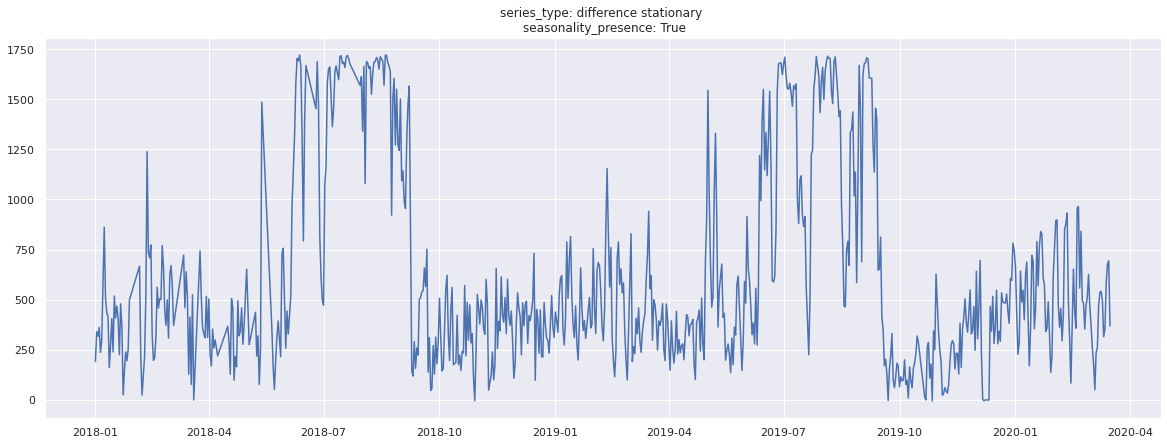

In [26]:
df1 = dd.reset_index()
df1 = df1.rename(columns={"timestamp": "time", "ActivePower": "value"})
df1["time"] = pd.to_datetime(df1['time'])
ts = TimeSeriesData(df1)
fft_detector = FFTDetector(ts)
seasonality_presence = fft_detector.detector()
seasonal_period = seasonality_presence['seasonalities']

test_result = []
    # ADF Test
adf_result = adfuller(dd, autolag='AIC')
p_adf = round(adf_result[1],4)
    # KPSS Test
kpss_result = kpss(dd, regression='ct')
p_kpss = round(kpss_result[1],4)
if p_adf > 0.05 and p_kpss < 0.05:
    test_result.append('non stationary')
elif p_kpss < 0.05 and p_kpss > 0.05:
    test_result.append('stationary')
elif p_kpss > 0.05 and p_kpss > 0.05:
    test_result.append('trend stationary')
else:
    test_result.append('difference stationary')
    
plt.figure(figsize=(20, 7))
plt.plot(dd)
    #ddgg.plot(figsize=(12, 8), title="S&P500 Prices")
plt.title('series_type: %s \n seasonality_presence: %s' % (test_result.pop(), seasonality_presence.get("seasonality_presence")))
plt.show()
#if bool(seasonal_period):
#Holt_Winters_Model_seasonal(dd, seasonal_period)
#else:
 #   Holt_Winters_Model_nonseasonal(dd)
    # Step 1. initiate TsFeatures
#model = TsFeatures()

# Step 2. use .transform() method, and apply on the target time series data
#output_features = model.transform(ts)
#print(output_features)

In [27]:
data = dd

y = data
#dataT = dd
    
ddf2 = dd[(dd.index >= dd.index.min()) & (dd.index < dd.index.max())]
dataT = ddf2
dataT = dataT.groupby([pd.Grouper(freq='H')]).mean()
avg = float(dataT[~np.isnan(dataT)].mean())
dataT = dataT.fillna(avg)
    #yT = dataT
        
dataset = dataT.values #numpy.ndarray
dataset = np.reshape(dataset, (-1, 1))
h = 7
    
    
length = y.values
length = np.reshape(length, (-1,1))
length = int(length.shape[0])
TrainLength = int(0.8*(length))
TrainingData = y[:TrainLength]
TestData = y[TrainLength:]
TestLength = length - TrainLength



In [28]:
TrainingData

ActivePower
timestamp              
2018-01-01   190.815478
2018-01-02   339.470285
2018-01-03   317.517653
2018-01-04   361.856700
2018-01-05   236.783611
...                 ...
2019-10-02   115.017126
2019-10-03    95.117222
2019-10-04    98.424191
2019-10-05   199.588704
2019-10-06    77.904231

[644 rows x 1 columns]

In [29]:
TestData

ActivePower
timestamp              
2019-10-07    98.109896
2019-10-08     8.911063
2019-10-09   164.359821
2019-10-10    98.035237
2019-10-11    59.561946
...                 ...
2020-03-12   353.652089
2020-03-13   580.446919
2020-03-14   677.050456
2020-03-15   693.703663
2020-03-16   368.582998

[162 rows x 1 columns]

In [30]:
dd

ActivePower
timestamp              
2018-01-01   190.815478
2018-01-02   339.470285
2018-01-03   317.517653
2018-01-04   361.856700
2018-01-05   236.783611
...                 ...
2020-03-12   353.652089
2020-03-13   580.446919
2020-03-14   677.050456
2020-03-15   693.703663
2020-03-16   368.582998

[806 rows x 1 columns]

In [31]:
x0 = 0 # start


    # Catch Value Error

fitData = ExponentialSmoothing(TrainingData, seasonal= "additive", seasonal_periods= int(seasonal_period[0]))
modelHW = fitData.fit() 

ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

In [32]:
seasonal_period

[403.0]

In [33]:
x0 = 0 # start


    # Catch Value Error
try:
    fitData = ExponentialSmoothing(TrainingData, seasonal= "additive", seasonal_periods= int(seasonal_period[0]))
    modelHW = fitData.fit() 
except (IndexError, ValueError):
    fitData = ExponentialSmoothing(TrainingData, seasonal= "additive")     
    modelHW = fitData.fit() 
#t1 = time.time()
#print("Time (s): ", t1-t0)
    
        # Predict
fc = modelHW.predict(x0,length+h)
    #fc = fc.to_numpy()
variable = list(y.columns)
prediction_dates = pd.date_range(y.index.min(), periods=length+h, freq="D").tolist()
predictions_df = pd.DataFrame(fc, prediction_dates, columns=[variable[0]])


In [34]:
predictions_df

ActivePower
2018-01-01   396.879399
2018-01-02   213.913713
2018-01-03   324.137043
2018-01-04   325.589262
2018-01-05   267.627628
...                 ...
2020-03-19   198.345619
2020-03-20   135.648346
2020-03-21    97.279477
2020-03-22    94.447887
2020-03-23   139.145627

[813 rows x 1 columns]

Train Score: 50686.4190 MSE (225.1364 RMSE) 162.9922 MAE
Test Score: 118535.8926 MSE (344.2904 RMSE) 278.0785 MAE


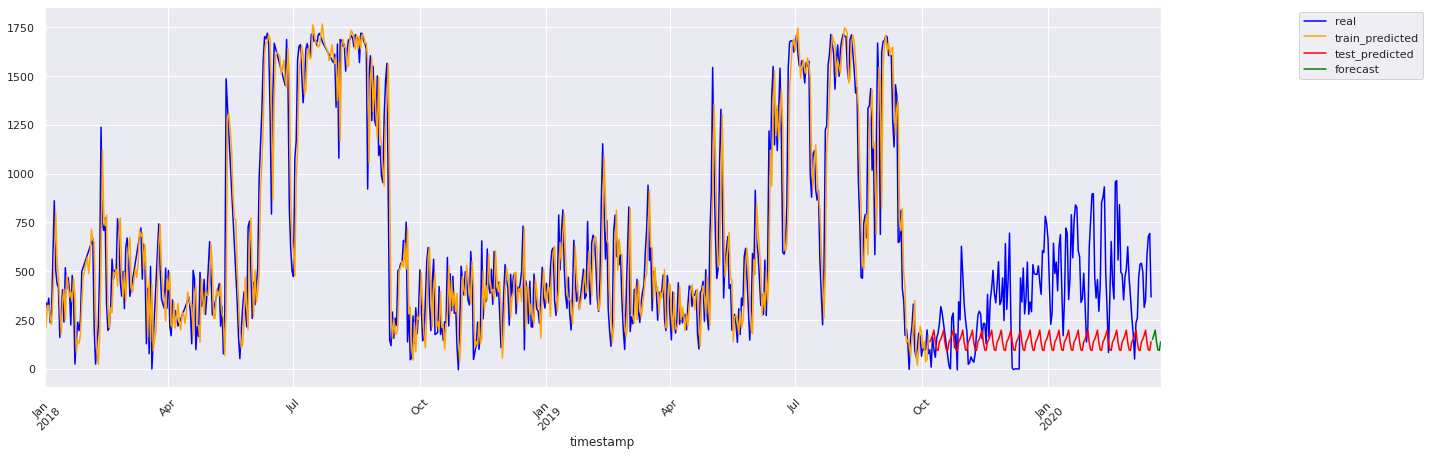

In [35]:
trainPredicted = predictions_df[:TrainLength]
trainExpected = TrainingData
train_mae = mean_absolute_error(trainExpected, trainPredicted)
train_mse = mean_squared_error(trainExpected, trainPredicted)
train_rmse = np.sqrt(train_mse)
    
    
    
testPredicted = predictions_df[TrainLength:-(h)]
testExpected = TestData
test_mae = mean_absolute_error(testExpected, testPredicted)
test_mse = mean_squared_error(testExpected, testPredicted)
test_rmse = np.sqrt(test_mse)


print('Train Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (train_mse, train_rmse, train_mae))
print('Test Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (test_mse, test_rmse, test_mae))
prediction =predictions_df[-(h):]


variable = list(y.columns)
    # plot baseline and predictions
plt.figure(figsize=(20, 7))
ax1 = y[variable[0]].plot(color='blue', grid=True, label='real')
ax2 = trainPredicted[variable[0]].plot(color='orange', grid=True, label='train_predicted')
ax3 = testPredicted[variable[0]].plot(color='red', grid=True, label='test_predicted')
ax4 = prediction[variable[0]].plot(color='green', grid=True, label='forecast')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
plt.show()

### ARIMA

In [ ]:
x0 = 0 # start

#ARIMA(1,1,0)(1,1,0)[403]  
s = int(seasonal_period[0])
    # Catch Value Error

fitData = ARIMA(TrainingData, order=(1, 1, 0), seasonal_order=(1, 0, 0, s))
modelARIMA = fitData.fit() 

#print("Time (s): ", t1-t0)
    
        # Predict
fc = modelARIMA.predict(x0,length+h)
    #fc = fc.to_numpy()
variable = list(y.columns)
prediction_dates = pd.date_range(y.index.min(), periods=length+h, freq="D").tolist()
predictions_df = pd.DataFrame(fc, prediction_dates, columns=[variable[0]])


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [ ]:
trainPredicted = predictions_df[:TrainLength]
trainExpected = TrainingData
train_mae = mean_absolute_error(trainExpected, trainPredicted)
train_mse = mean_squared_error(trainExpected, trainPredicted)
train_rmse = np.sqrt(train_mse)
    
    
    
testPredicted = predictions_df[TrainLength:-(h)]
testExpected = TestData
test_mae = mean_absolute_error(testExpected, testPredicted)
test_mse = mean_squared_error(testExpected, testPredicted)
test_rmse = np.sqrt(test_mse)


print('Train Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (train_mse, train_rmse, train_mae))
print('Test Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (test_mse, test_rmse, test_mae))
prediction =predictions_df[-(h):]


variable = list(y.columns)
    # plot baseline and predictions
plt.figure(figsize=(20, 7))
ax1 = y[variable[0]].plot(color='blue', grid=True, label='real')
ax2 = trainPredicted[variable[0]].plot(color='orange', grid=True, label='train_predicted')
ax3 = testPredicted[variable[0]].plot(color='red', grid=True, label='test_predicted')
ax4 = prediction[variable[0]].plot(color='green', grid=True, label='forecast')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
plt.show()

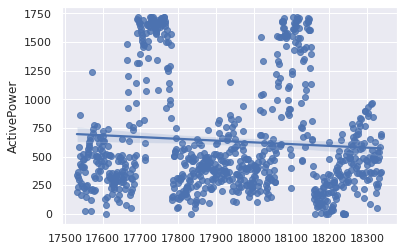

In [57]:
import matplotlib.dates as mdates

sns.regplot(x=mdates.date2num(dd.index), y=dd['ActivePower']);


In [46]:
from pmdarima.arima.utils import nsdiffs
from pmdarima.arima.utils import ndiffs
import pmdarima as pm

In [48]:
data = dd

y = data
dataT = dd
    
ddf2 = dd[(dd.index >= dd.index.min()) & (dd.index < dd.index.max())]
dataT = ddf2
dataT = dataT.groupby([pd.Grouper(freq='H')]).mean()
avg = float(dataT[~np.isnan(dataT)].mean())
dataT = dataT.fillna(avg)
    #yT = dataT
        
dataset = dataT.values #numpy.ndarray
dataset = np.reshape(dataset, (-1, 1))
h = int(dataset.shape[0]*0.1)
    
    
length = y.values
length = np.reshape(length, (-1,1))
length = int(length.shape[0])
TrainLength = int(0.8*(length))
TrainingData = y[:TrainLength]
TestData = y[TrainLength:]
TestLength = length - TrainLength



In [49]:
# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(TrainingData, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9090.807, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8851.916, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=9084.026, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8785.018, Time=0.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=8790.220, Time=0.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=8777.638, Time=1.02 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=8845.508, Time=0.44 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.15 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=8774.949, Time=1.16 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=8844.7

In [50]:
# Fit two different ARIMAs
m1 = pm.auto_arima(TrainingData, error_action='ignore', seasonal=True, m=12)
m12 = pm.auto_arima(TrainingData, error_action='ignore', seasonal=True, m=403)

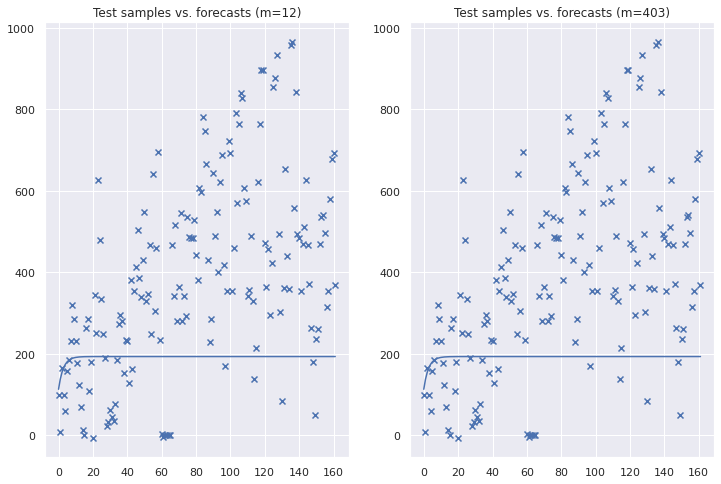

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
x = np.arange(TestData.shape[0])

# Plot m=1
axes[0].scatter(x, TestData, marker='x')
axes[0].plot(x, m1.predict(n_periods=TestData.shape[0]))
axes[0].set_title('Test samples vs. forecasts (m=12)')

# Plot m=12
axes[1].scatter(x, TestData, marker='x')
axes[1].plot(x, m12.predict(n_periods=TestData.shape[0]))
axes[1].set_title('Test samples vs. forecasts (m=403)')

plt.show()

In [53]:
TestData.shape[0]

162

In [43]:
seasonal_period

[403.0]

In [56]:
fc1 = m1.predict(n_periods=TestData.shape[0])
#fc1

In [60]:
fc1 = m1.predict(n_periods=TestLength+h)
#fc = fc.to_numpy()
variable = list(y.columns)
prediction_dates = pd.date_range(TestData.index.min(), periods=TestLength+h, freq="H").tolist()
predictions_df = pd.DataFrame(fc1, prediction_dates, columns=[variable[0]])

testPredicted = predictions_df[:-(h)]
testExpected = TestData
test_mae = mean_absolute_error(testExpected, testPredicted)
test_mse = mean_squared_error(testExpected, testPredicted)
test_rmse = np.sqrt(test_mse)

In [59]:
len(prediction_dates)

2091

In [62]:
variable = list(y.columns)
variable

['ActivePower']

In [64]:
fc1

array([112.98472688, 137.39713607, 154.38565642, ..., 193.26148407,
       193.26148407, 193.26148407])

In [24]:
dataD

ActivePower
timestamp              
2018-01-01   190.815478
2018-01-02   339.470285
2018-01-03   317.517653
2018-01-04   361.856700
2018-01-05   236.783611
...                 ...
2020-03-12   353.652089
2020-03-13   580.446919
2020-03-14   677.050456
2020-03-15   693.703663
2020-03-16   368.582998

[806 rows x 1 columns]

In [68]:
TrainLength

644

In [71]:
len(trainPredicted)

1285

In [26]:
fc1 = m1.predict(n_periods=length+h)
#fc = fc.to_numpy()
variable = list(y.columns)
prediction_dates = pd.date_range(y.index.min(), periods=length+h, freq="H").tolist()
predictions_df = pd.DataFrame(fc1, prediction_dates, columns=[variable[0]])

#trainPredicted = predictions_df[TrainLength:h]

trainPredicted = predictions_df[:TrainLength]
trainExpected = TrainingData
#predictions = fc
train_mae = mean_absolute_error(trainExpected, trainPredicted)
train_mse = mean_squared_error(trainExpected, trainPredicted)
train_rmse = np.sqrt(train_mse)


testPredicted = predictions_df[TrainLength:-(h)]
testExpected = TestData
test_mae = mean_absolute_error(testExpected, testPredicted)
test_mse = mean_squared_error(testExpected, testPredicted)
test_rmse = np.sqrt(test_mse)







print('Train Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (train_mse, train_rmse, train_mae))
print('Test Score: %.4f MSE (%.4f RMSE) %.4f MAE' % (test_mse, test_rmse, test_mae))
prediction =predictions_df[-(h):]


#variable = list(y.columns)
    # plot baseline and predictions
plt.figure(figsize=(20, 7))
ax1 = y[variable[0]].plot(color='blue', grid=True, label='real')
ax2 = trainPredicted[variable[0]].plot(color='orange', grid=True, label='train_predicted')
ax3 = testPredicted[variable[0]].plot(color='red', grid=True, label='test_predicted')
ax4 = prediction[variable[0]].plot(color='green', grid=True, label='forecast')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
plt.show()




NameError: name 'm1' is not defined

In [87]:
trainExpected

ActivePower
timestamp              
2018-01-01   190.815478
2018-01-02   339.470285
2018-01-03   317.517653
2018-01-04   361.856700
2018-01-05   236.783611
...                 ...
2019-10-02   115.017126
2019-10-03    95.117222
2019-10-04    98.424191
2019-10-05   199.588704
2019-10-06    77.904231

[644 rows x 1 columns]

<AxesSubplot:xlabel='timestamp'>

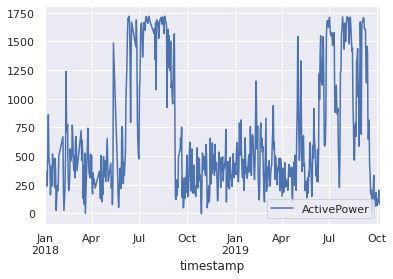

In [83]:
trainExpected.plot()

In [86]:
trainPredicted

ActivePower
2018-01-01 00:00:00   112.984727
2018-01-01 01:00:00   137.397136
2018-01-01 02:00:00   154.385656
2018-01-01 03:00:00   166.207915
2018-01-01 04:00:00   174.434989
...                          ...
2018-01-27 15:00:00   193.261484
2018-01-27 16:00:00   193.261484
2018-01-27 17:00:00   193.261484
2018-01-27 18:00:00   193.261484
2018-01-27 19:00:00   193.261484

[644 rows x 1 columns]

<AxesSubplot:>

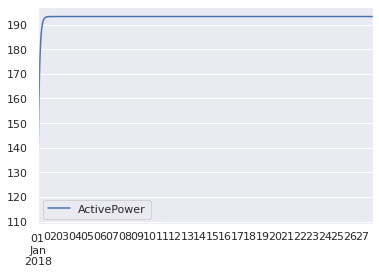

In [85]:
trainPredicted.plot()

In [77]:
testPredicted

ActivePower
2018-01-27 20:00:00   193.261484
2018-01-27 21:00:00   193.261484
2018-01-27 22:00:00   193.261484
2018-01-27 23:00:00   193.261484
2018-01-28 00:00:00   193.261484
...                          ...
2018-02-03 09:00:00   193.261484
2018-02-03 10:00:00   193.261484
2018-02-03 11:00:00   193.261484
2018-02-03 12:00:00   193.261484
2018-02-03 13:00:00   193.261484

[162 rows x 1 columns]

In [78]:
testExpected

ActivePower
timestamp              
2019-10-07    98.109896
2019-10-08     8.911063
2019-10-09   164.359821
2019-10-10    98.035237
2019-10-11    59.561946
...                 ...
2020-03-12   353.652089
2020-03-13   580.446919
2020-03-14   677.050456
2020-03-15   693.703663
2020-03-16   368.582998

[162 rows x 1 columns]

In [25]:
y

NameError: name 'y' is not defined

In [36]:
model = TsFeatures()

# Step 2. use .transform() method, and apply on the target time series data
output_features = model.transform(ts)
print(output_features)

TypeError: acf() got an unexpected keyword argument 'unbiased'

In [17]:
dfCM[['ActivePower']]

ActivePower
timestamp                       
2018-01-01 00:00:00    -5.357727
2018-01-01 00:10:00    -5.822360
2018-01-01 00:20:00    -5.279409
2018-01-01 00:30:00    -4.648054
2018-01-01 00:40:00    -4.684632
...                          ...
2020-03-16 13:50:00  1272.653338
2020-03-16 14:00:00  1426.427583
2020-03-16 14:10:00  1199.463009
2020-03-16 14:20:00  1180.253012
2020-03-16 14:30:00  1637.699011

[116008 rows x 1 columns]

In [16]:
df[['timestamp']]

timestamp
0      2017-12-31 00:00:00+00:00
1      2017-12-31 00:10:00+00:00
2      2017-12-31 00:20:00+00:00
3      2017-12-31 00:30:00+00:00
4      2017-12-31 00:40:00+00:00
...                          ...
116147 2020-03-16 13:50:00+00:00
116148 2020-03-16 14:00:00+00:00
116149 2020-03-16 14:10:00+00:00
116150 2020-03-16 14:20:00+00:00
116151 2020-03-16 14:30:00+00:00

[116152 rows x 1 columns]

In [18]:
type(df[['timestamp']])

pandas.core.frame.DataFrame

In [15]:
df.timestamp

0        2017-12-31 00:00:00+00:00
1        2017-12-31 00:10:00+00:00
2        2017-12-31 00:20:00+00:00
3        2017-12-31 00:30:00+00:00
4        2017-12-31 00:40:00+00:00
                    ...           
116147   2020-03-16 13:50:00+00:00
116148   2020-03-16 14:00:00+00:00
116149   2020-03-16 14:10:00+00:00
116150   2020-03-16 14:20:00+00:00
116151   2020-03-16 14:30:00+00:00
Name: timestamp, Length: 116152, dtype: datetime64[ns, UTC]

In [14]:
df['timestamp']

0        2017-12-31 00:00:00+00:00
1        2017-12-31 00:10:00+00:00
2        2017-12-31 00:20:00+00:00
3        2017-12-31 00:30:00+00:00
4        2017-12-31 00:40:00+00:00
                    ...           
116147   2020-03-16 13:50:00+00:00
116148   2020-03-16 14:00:00+00:00
116149   2020-03-16 14:10:00+00:00
116150   2020-03-16 14:20:00+00:00
116151   2020-03-16 14:30:00+00:00
Name: timestamp, Length: 116152, dtype: datetime64[ns, UTC]

In [17]:
ts = pd.Timestamp(df[['timestamp']])
ts.tz_localize()

TypeError: Cannot convert input [                       timestamp
0      2017-12-31 00:00:00+00:00
1      2017-12-31 00:10:00+00:00
2      2017-12-31 00:20:00+00:00
3      2017-12-31 00:30:00+00:00
4      2017-12-31 00:40:00+00:00
...                          ...
116147 2020-03-16 13:50:00+00:00
116148 2020-03-16 14:00:00+00:00
116149 2020-03-16 14:10:00+00:00
116150 2020-03-16 14:20:00+00:00
116151 2020-03-16 14:30:00+00:00

[116152 rows x 1 columns]] of type <class 'pandas.core.frame.DataFrame'> to Timestamp

In [13]:
ts = pd.Timestamp(df['timestamp'])
ts.tz_localize()
#tz_localize(tz='Europe/Stockholm')

TypeError: Cannot convert input [0        2017-12-31 00:00:00+00:00
1        2017-12-31 00:10:00+00:00
2        2017-12-31 00:20:00+00:00
3        2017-12-31 00:30:00+00:00
4        2017-12-31 00:40:00+00:00
                    ...           
116147   2020-03-16 13:50:00+00:00
116148   2020-03-16 14:00:00+00:00
116149   2020-03-16 14:10:00+00:00
116150   2020-03-16 14:20:00+00:00
116151   2020-03-16 14:30:00+00:00
Name: timestamp, Length: 116152, dtype: datetime64[ns, UTC]] of type <class 'pandas.core.series.Series'> to Timestamp

In [ ]:
timestamp_int = 1329988320000
date = datetime.datetime.utcfromtimestamp(timestamp_int / 1e3)
print("Corresponding date for the integer timestamp is::", date)

In [28]:
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S-%Z')
df.set_index('timestamp')
#dfCM = df.loc['2018-01-01 00:00:00+00:00':]

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
timestamp                                                                            
2017-12-31 00:00:00+00:00          NaN                NaN                      NaN   
2017-12-31 00:10:00+00:00          NaN                NaN                      NaN   
2017-12-31 00:20:00+00:00          NaN                NaN                      NaN   
2017-12-31 00:30:00+00:00          NaN                NaN                      NaN   
2017-12-31 00:40:00+00:00          NaN                NaN                      NaN   
...                                ...                ...                      ...   
2020-03-16 13:50:00+00:00  1272.653338          31.463034                48.073942   
2020-03-16 14:00:00+00:00  1426.427583          31.259208                48.545231   
2020-03-16 14:10:00+00:00  1199.463009          31.109058                48.774633   
2020-03-16 14:20:00+00:00  1180.253012          30.998690                48.620518   
2020-03-16 14:30:00+00:00  1637.699011          30.845666                49.069272   

                           Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
timestamp                                                                         
2017-12-31 00:00:00+00:00               NaN               NaN               NaN   
2017-12-31 00:10:00+00:00               NaN               NaN               NaN   
2017-12-31 00:20:00+00:00               NaN               NaN               NaN   
2017-12-31 00:30:00+00:00               NaN               NaN               NaN   
2017-12-31 00:40:00+00:00               NaN               NaN               NaN   
...                                     ...               ...               ...   
2020-03-16 13:50:00+00:00         -0.348887         -0.229604         -0.229604   
2020-03-16 14:00:00+00:00         -0.562167         -0.069016         -0.069016   
2020-03-16 14:10:00+00:00         -0.411110         -0.154350         -0.154350   
2020-03-16 14:20:00+00:00         -0.922951         -0.408702         -0.408702   
2020-03-16 14:30:00+00:00          0.157450          0.641613          0.641613   

                           ControlBoxTemperature  GearboxBearingTemperature  \
timestamp                                                                     
2017-12-31 00:00:00+00:00                    NaN                        NaN   
2017-12-31 00:10:00+00:00                    NaN                        NaN   
2017-12-31 00:20:00+00:00                    NaN                        NaN   
2017-12-31 00:30:00+00:00                    NaN                        NaN   
2017-12-31 00:40:00+00:00                    NaN                        NaN   
...                                          ...                        ...   
2020-03-16 13:50:00+00:00                    0.0                  71.324532   
2020-03-16 14:00:00+00:00                    0.0                  72.567267   
2020-03-16 14:10:00+00:00                    0.0                  72.233277   
2020-03-16 14:20:00+00:00                    0.0                  71.302105   
2020-03-16 14:30:00+00:00                    0.0                  73.098539   

                           GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
timestamp                                                                                      
2017-12-31 00:00:00+00:00                    NaN           NaN                           NaN   
2017-12-31 00:10:00+00:00                    NaN           NaN                           NaN   
2017-12-31 00:20:00+00:00                    NaN           NaN                           NaN   
2017-12-31 00:30:00+00:00                    NaN           NaN                           NaN   
2017-12-31 00:40:00+00:00                    NaN           NaN                           NaN   
...                                          ...           ...                           ...   
2020-03-16 13:50:00+00:00       

In [30]:
df['ActivePower']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
116147    1272.653338
116148    1426.427583
116149    1199.463009
116150    1180.253012
116151    1637.699011
Name: ActivePower, Length: 116152, dtype: float64

In [29]:
dfCM.head()

timestamp  ActivePower  AmbientTemperatue  BearingShaftTemperature  \
20180 2018-05-20 03:20:00+00:00          NaN                NaN                      NaN   
20181 2018-05-20 03:30:00+00:00          NaN                NaN                      NaN   
20182 2018-05-20 03:40:00+00:00          NaN                NaN                      NaN   
20183 2018-05-20 03:50:00+00:00          NaN                NaN                      NaN   
20184 2018-05-20 04:00:00+00:00          NaN                NaN                      NaN   

       Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  ControlBoxTemperature  \
20180               NaN               NaN               NaN                    NaN   
20181               NaN               NaN               NaN                    NaN   
20182               NaN               NaN               NaN                    NaN   
20183               NaN               NaN               NaN                    NaN   
20184               NaN               NaN               NaN                    NaN   

       GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  \
20180                        NaN                    NaN           NaN   
20181                        NaN                    NaN           NaN   
20182                        NaN                    NaN           NaN   
20183                        NaN                    NaN           NaN   
20184                        NaN                    NaN           NaN   

       GeneratorWinding1Temperature  GeneratorWinding2Temperature  HubTemperature  \
20180                           NaN                           NaN             NaN   
20181                           NaN                           NaN             NaN   
20182                           NaN                           NaN             NaN   
20183                           NaN                           NaN             NaN   
20184                           NaN                           NaN             NaN   

       MainBoxTemperature  NacellePosition  ReactivePower  RotorRPM  TurbineStatus  WTG  \
20180                 NaN              NaN            NaN       NaN            NaN  G01   
20181                 NaN              NaN            NaN       NaN            NaN  G01   
20182                 NaN              NaN            NaN       NaN            NaN  G01   
20183                 NaN              NaN            NaN       NaN            NaN  G01   
20184                 NaN              NaN            NaN       NaN            NaN  G01   

       WindDirection  WindSpeed  
20180            NaN        NaN  
20181            NaN        NaN  
20182            NaN        NaN  
20183            NaN        NaN  
20184            NaN        NaN

In [15]:
dff = dfCM[['ActivePower']]

In [16]:
dff

ActivePower
20180           NaN
20181           NaN
20182           NaN
20183           NaN
20184           NaN
...             ...
116147  1272.653338
116148  1426.427583
116149  1199.463009
116150  1180.253012
116151  1637.699011

[95972 rows x 1 columns]

In [25]:
import math


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
from jupyter_dash import JupyterDash
import dash_html_components as html
#import pandas as pd
import plotly.graph_objs as go
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from datetime import date
import plotly.express as px

In [26]:
def create_dataset(dataset, look_back=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [28]:
# This implement the prediction
def predict(num_prediction, model, df, look_back):
    prediction_list = df[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        x = np.reshape(x, (x.shape[0], 1, x.shape[1]))
        out = model.predict(x)
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

# Provides date index for the number of days of prediction
def predict_dates(num_prediction, df):
    last_date = df.index.max()
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq="D").tolist()
    return prediction_dates


In [29]:
dataD

ActivePower
timestamp              
2018-01-01   190.815478
2018-01-02   339.470285
2018-01-03   317.517653
2018-01-04   361.856700
2018-01-05   236.783611
...                 ...
2020-03-12   353.652089
2020-03-13   580.446919
2020-03-14   677.050456
2020-03-15   693.703663
2020-03-16   368.582998

[806 rows x 1 columns]

In [30]:
#data

2022-06-12 03:19:58.166143: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-12 03:19:58.397427: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-12 03:19:58.415123: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Epoch 1/100
32/32 - 2s - loss: 0.0771 - val_loss: 0.0157
Epoch 2/100
32/32 - 0s - loss: 0.0246 - val_loss: 0.0115
Epoch 3/100
32/32 - 0s - loss: 0.0205 - val_loss: 0.0113
Epoch 4/100
32/32 - 0s - loss: 0.0209 - val_loss: 0.0128
Epoch 5/100
32/32 - 0s - loss: 0.0199 - val_loss: 0.0105
Epoch 6/100
32/32 - 0s - loss: 0.0185 - val_loss: 0.0102
Epoch 7/100
32/32 - 0s - loss: 0.0183 - val_loss: 0.0109
Epoch 8/100
32/32 - 0s - loss: 0.0178 - val_loss: 0.0103
Epoch 9/100
32/32 - 0s - loss: 0.0178 - val_loss: 0.0103
Epoch 10/100
32/32 - 0s - loss: 0.0182 - val_loss: 0.0103
Epoch 11/100
32/32 - 0s - loss: 0.0180 - val_loss: 0.0105
Epoch 12/100
32/32 - 0s - loss: 0.0174 - val_loss: 0.0101
Epoch 13/100
32/32 - 0s - loss: 0.0174 - val_loss: 0.0108
Epoch 14/100
32/32 - 0s - loss: 0.0168 - val_loss: 0.0102
Epoch 15/100
32/32 - 0s - loss: 0.0170 - val_loss: 0.0102
Epoch 16/100
32/32 - 0s - loss: 0.0167 - val_loss: 0.0106
Epoch 17/100
32/32 - 0s - loss: 0.0170 - val_loss: 0.0104
Epoch 18/100
32/32 - 0s

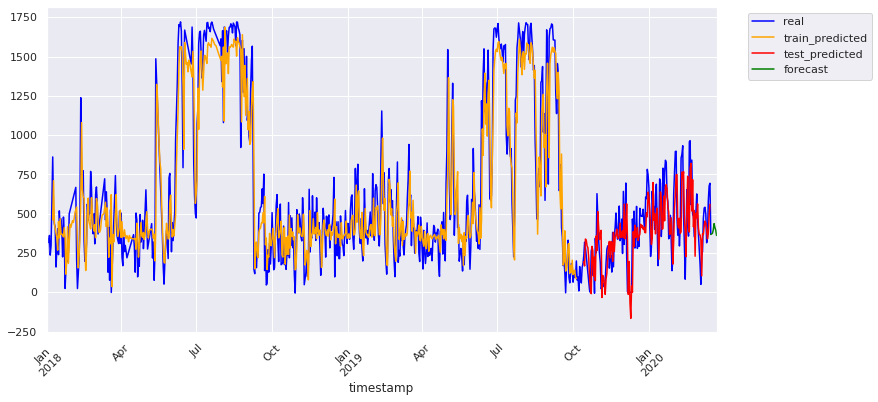

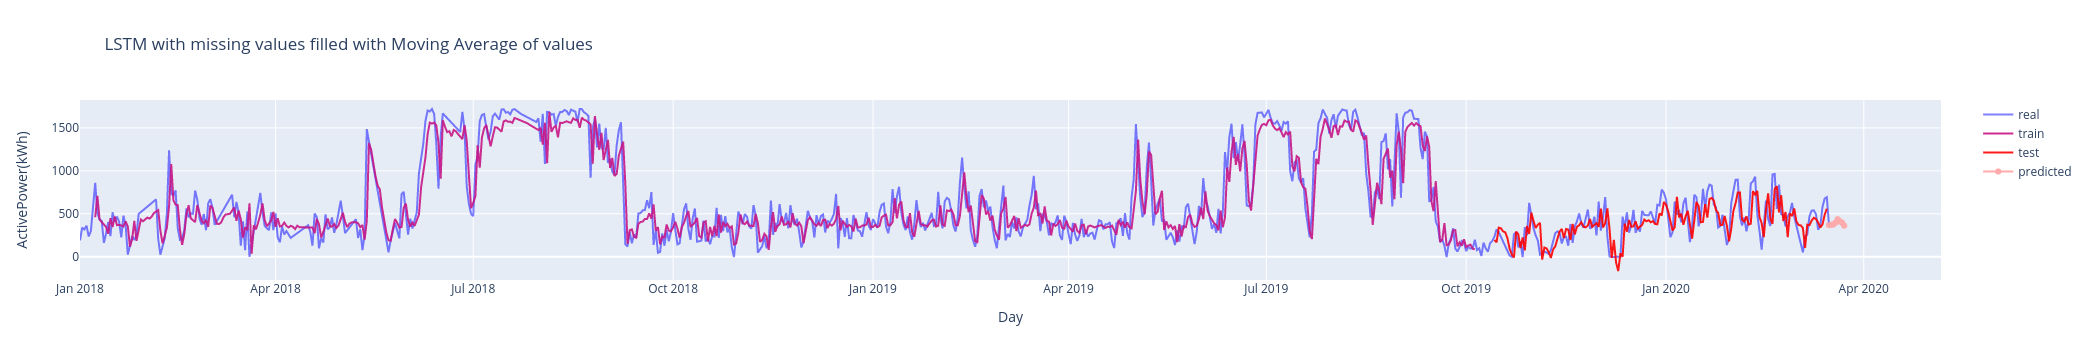

In [31]:
# normalize the dataset


# Using Moving Average for missing values imputation after aggregation
dataset = dataD
    #Moving Average Imputation
data = dataset.interpolate()
variable = 'ActivePower'
dataset = data[variable]
dataset = dataset.to_numpy(dataset)
dataset = dataset.reshape(-1,1)
h = int(dataset.shape[0]*0.1)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]




# reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit Multilayer Perceptron model
modelL = Sequential()
modelL.add(LSTM(64, input_dim=look_back))
#model.add(LSTM(units = 64))
modelL.add(Dropout(0.2))
modelL.add(Dense(units = 128, activation='relu'))
modelL.add(Dense(units = 64, activation='relu'))
modelL.add(Dense(units = 1))
modelL.compile(loss= 'mean_squared_error', optimizer= 'adam' )
modelL.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=20, verbose=2)

# generate predictions for training
trainPredict = modelL.predict(trainX)
testPredict = modelL.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# get data in dataframe
df_train = pd.DataFrame({'predicted_train': trainPredictPlot.flatten()})
ticks = data.index
df_train.index = ticks
df_test = pd.DataFrame({'predicted_test': testPredictPlot.flatten()})
df_test.index = ticks
result = pd.concat([data, df_train.reindex(data.index), df_test.reindex(data.index)], axis=1)


h = 7

forecast_dates = predict_dates(h, data)
forecast = predict(h, modelL, dataset, look_back)
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
forecast = forecast.flatten()
forecast_df = pd.DataFrame(forecast, forecast_dates, columns=[variable])

predictions = forecast_df[(forecast_df.index >= forecast_df.index.min()) & (forecast_df.index <= forecast_df.index.max())]
prediction_ticks = predictions.index


# plot baseline and predictions
plt.figure(figsize=(12,6))
ax1 = result.ActivePower.plot(color='blue', grid=True, label='real')
ax2 = result.predicted_train.plot(color='orange', grid=True, label='train_predicted')
ax3 = result.predicted_test.plot(color='red', grid=True, label='test_predicted')
ax4 = forecast_df.ActivePower.plot(color='green', grid=True, label='forecast')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.24, 1), loc='upper right')
plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data[variable],
        opacity=.5,
        name = 'real',
        line = dict(width = 2,
                            color = 'rgb(0, 0, 255)')))
fig.add_trace(go.Scatter(x = df_train.index, y = df_train['predicted_train'],
        opacity=.9,
        name = 'train',
        line = dict(width = 2,
                    color = 'rgb(199,21,133)')))
fig.add_trace(go.Scatter(x = df_test.index, y = df_test['predicted_test'],
        opacity=.9,
        name = 'test',
        line = dict(width = 2,
                    color = 'rgb(255, 0, 0)')))
fig.add_trace(go.Scatter(x = prediction_ticks, y = predictions[variable],
        opacity=.9,
        name = 'predicted',
        line = dict(width = 2,
                    color = 'rgb(255,162,163)')))


# Edit the layout
fig.update_layout(title='LSTM with missing values filled with Moving Average of values',
                   xaxis_title='Day',
                   yaxis_title='ActivePower(kWh)')


fig.show()


#### Active Power is negative around the second week of December 2019, why?
 - The negative is neither right nor wrong. There is negative if the turbine is taking power from the grid. If it supplies power to the grid then it is positive